In [9]:
!pip install akshare pandas matplotlib

import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Fetch Xiaomi stock data (HKEX)
def get_xiaomi_data():
    """
    Use akshare to fetch Xiaomi Corporation (1810.HK) daily stock data
    """
    try:
        print("Fetching Xiaomi Corporation stock data from Akshare...")
        data = ak.stock_hk_daily(symbol="01810", adjust="qfq")  # Xiaomi stock code: "01810"
        data.reset_index(inplace=True)  # Reset index for easier handling
        data.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Turnover"]  # Rename columns
        data["Date"] = pd.to_datetime(data["Date"])  # Convert dates to datetime format
        data.set_index("Date", inplace=True)  # Set date as index
        print("Data fetched successfully!")
        return data
    except Exception as e:
        print(f"Failed to fetch data: {e}")
        return pd.DataFrame()

# Step 2: Calculate moving averages and signals
def calculate_signals(data, short_window=5, long_window=20):
    """
    Calculate short-term and long-term moving averages, and generate buy/sell signals
    :param data: Stock data
    :param short_window: Short-term moving average window (default: 5 days)
    :param long_window: Long-term moving average window (default: 20 days)
    """
    # Calculate short-term and long-term moving averages
    data["Short_MA"] = data["Close"].rolling(window=short_window).mean()  # Short-term moving average
    data["Long_MA"] = data["Close"].rolling(window=long_window).mean()  # Long-term moving average

    # Generate trading signals: 1 for buy, -1 for sell
    data["Signal"] = 0
    data.loc[data["Short_MA"] > data["Long_MA"], "Signal"] = 1  # Buy signal: short MA crosses above long MA
    data.loc[data["Short_MA"] <= data["Long_MA"], "Signal"] = -1  # Sell signal: short MA crosses below long MA
    print("Moving averages and trading signals calculated successfully!")
    return data

# Step 3: Backtest strategy and calculate Sharpe Ratio
def backtest_and_evaluate(data, risk_free_rate=0.02):
    """
    Backtest the strategy and calculate Sharpe Ratio to evaluate risk-adjusted returns
    :param data: Stock data
    :param risk_free_rate: Risk-free rate (default: 2%)
    """
    # Calculate daily returns
    data["Return"] = data["Close"].pct_change()

    # Strategy returns: signal (lagged by one day) multiplied by daily returns
    data["Strategy_Return"] = data["Signal"].shift(1) * data["Return"]

    # Cumulative returns
    data["Cumulative_Strategy"] = (1 + data["Strategy_Return"]).cumprod()
    data["Cumulative_Market"] = (1 + data["Return"]).cumprod()

    # Calculate Sharpe Ratio
    strategy_return = data["Strategy_Return"].dropna()
    excess_return = strategy_return - risk_free_rate / 252  # Excess returns
    sharpe_ratio = np.sqrt(252) * excess_return.mean() / excess_return.std()

    print(f"Strategy Sharpe Ratio: {sharpe_ratio:.4f}")
    return data, sharpe_ratio

# Step 4: Plot results
def plot_results(data):
    """
    Plot the performance of the strategy vs the market benchmark
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data["Cumulative_Strategy"], label="Strategy Returns", color="blue")
    plt.plot(data["Cumulative_Market"], label="Market Benchmark Returns", color="green")
    plt.title("Strategy Performance Comparison")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid()
    plt.show()

# Main program
if __name__ == "__main__":
    # Fetch Xiaomi stock data
    xiaomi_data = get_xiaomi_data()

    # Save raw data to CSV
    if not xiaomi_data.empty:
        xiaomi_data.to_csv("xiaomi_stock_data.csv")
        print("Data saved as xiaomi_stock_data.csv")

    # Calculate moving averages and signals
    xiaomi_data = calculate_signals(xiaomi_data, short_window=5, long_window=20)

    # Backtest strategy and calculate Sharpe Ratio
    xiaomi_data, sharpe_ratio = backtest_and_evaluate(xiaomi_data)

    # Plot results
    plot_results(xiaomi_data)


Fetching Xiaomi Corporation stock data from Akshare...
Failed to fetch data: HTTPSConnectionPool(host='finance.sina.com.cn', port=443): Max retries exceeded with url: /stock/hkstock/01810/klc_kl.js (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1000)')))


KeyError: 'Close'

正在从 Akshare 获取小米公司港股数据...
数据获取成功！
数据已保存为 CSV 文件：xiaomi_stock_data_akshare.csv
计算均线完成，最后几行数据：
                                 收盘价  SMA_5   SMA_20
日期                                                  
1970-01-01 00:00:00.000001599  35.65  34.16  31.3775
1970-01-01 00:00:00.000001600  32.75  33.97  31.5750
1970-01-01 00:00:00.000001601  32.20  33.60  31.7225
1970-01-01 00:00:00.000001602  32.65  33.45  31.8825
1970-01-01 00:00:00.000001603  33.40  33.33  32.0125


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28207 (\N{CJK UNIFIED IDEOGRAPH-6E2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24065 (\N{CJK UNIFIED IDEOGRAPH-5E01}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabt

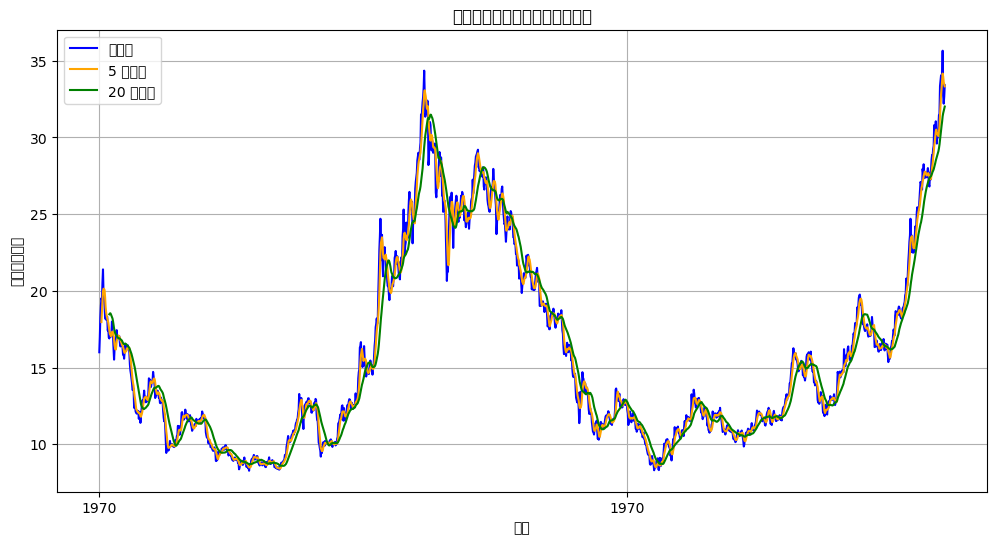

In [10]:
!pip install akshare pandas matplotlib
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt

# 1. 获取小米公司港股数据
def get_xiaomi_data():
    """
    使用 akshare 获取小米公司（1810.HK）港股日线行情数据
    """
    try:
        # 获取小米公司股票数据（港股数据）
        print("正在从 Akshare 获取小米公司港股数据...")
        data = ak.stock_hk_daily(symbol="01810", adjust="qfq")  # 小米股票代码为 "01810"
        data.reset_index(inplace=True)  # 重置索引，方便后续处理
        data.columns = ["日期", "开盘价", "最高价", "最低价", "收盘价", "成交量", "成交额"]  # 重命名列
        data["日期"] = pd.to_datetime(data["日期"])  # 转换日期格式
        data.set_index("日期", inplace=True)  # 设置日期为索引
        print("数据获取成功！")
        return data
    except Exception as e:
        print(f"获取数据失败：{e}")
        return pd.DataFrame()

# 2. 计算均线并绘图
def process_and_plot(data):
    """
    计算均线并绘制收盘价与均线的走势图
    """
    if data.empty:
        print("数据为空，无法处理。")
        return
    
    # 计算简单移动均线 (SMA)
    data["SMA_5"] = data["收盘价"].rolling(window=5).mean()  # 5 日均线
    data["SMA_20"] = data["收盘价"].rolling(window=20).mean()  # 20 日均线

    # 打印最后几行数据
    print("计算均线完成，最后几行数据：")
    print(data[["收盘价", "SMA_5", "SMA_20"]].tail())

    # 绘制图表
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["收盘价"], label="收盘价", color="blue")
    plt.plot(data.index, data["SMA_5"], label="5 日均线", color="orange")
    plt.plot(data.index, data["SMA_20"], label="20 日均线", color="green")
    plt.title("小米公司股票收盘价与均线走势")
    plt.xlabel("日期")
    plt.ylabel("价格（港币）")
    plt.legend()
    plt.grid()
    plt.show()

# 3. 主函数
if __name__ == "__main__":
    # 获取数据
    xiaomi_data = get_xiaomi_data()

    # 保存数据到 CSV 文件
    if not xiaomi_data.empty:
        csv_filename = "xiaomi_stock_data_akshare.csv"
        xiaomi_data.to_csv(csv_filename)
        print(f"数据已保存为 CSV 文件：{csv_filename}")

    # 处理数据并绘图
    process_and_plot(xiaomi_data)


正在从 Akshare 获取小米公司港股数据...
数据获取成功！
数据已保存为 xiaomi_stock_data.csv
均线和交易信号计算完成！
策略回测完成！
止损止盈逻辑计算完成！


D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31215 (\N{CJK UNIFIED IDEOGRAPH-79EF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda3\Lib\site-packages\IPython\core\pylabt

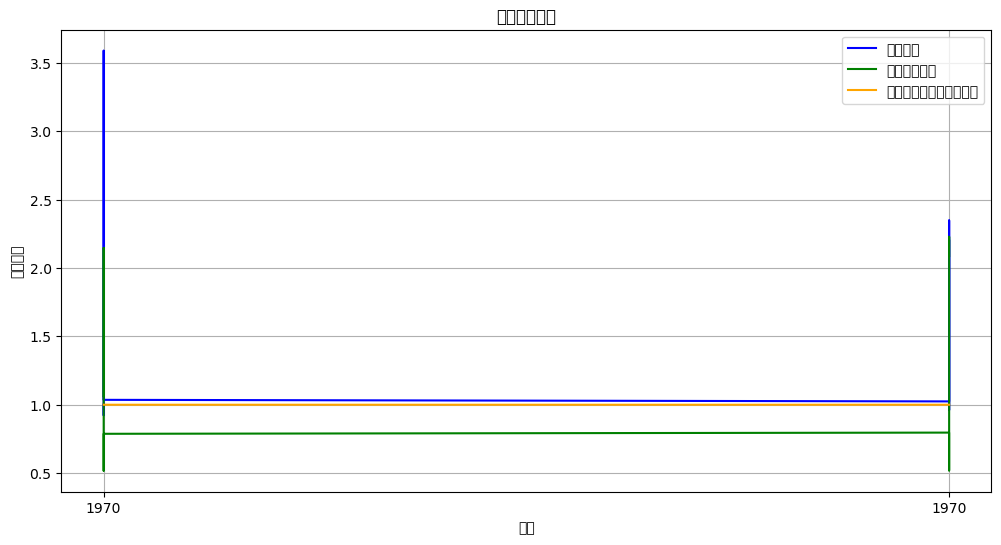

In [11]:
!pip install akshare pandas matplotlib
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: 获取小米公司港股数据
def get_xiaomi_data():
    """
    使用 akshare 获取小米公司（1810.HK）港股日线行情数据
    """
    try:
        # 获取小米公司股票数据（港股数据）
        print("正在从 Akshare 获取小米公司港股数据...")
        data = ak.stock_hk_daily(symbol="01810", adjust="qfq")  # 小米股票代码为 "01810"
        data.reset_index(inplace=True)  # 重置索引，方便后续处理
        data.columns = ["日期", "开盘价", "最高价", "最低价", "收盘价", "成交量", "成交额"]  # 重命名列
        data["日期"] = pd.to_datetime(data["日期"])  # 转换日期格式
        data.set_index("日期", inplace=True)  # 设置日期为索引
        print("数据获取成功！")
        return data
    except Exception as e:
        print(f"获取数据失败：{e}")
        return pd.DataFrame()

# Step 2: 计算均线和信号
def calculate_signals(data):
    """
    计算5日和20日均线，并生成买卖信号
    """
    # 计算简单移动均线 (SMA)
    data["SMA_5"] = data["收盘价"].rolling(window=5).mean()  # 5 日均线
    data["SMA_20"] = data["收盘价"].rolling(window=20).mean()  # 20 日均线

    # 生成交易信号：1表示买入，-1表示卖出
    data["Signal"] = 0
    data.loc[data["SMA_5"] > data["SMA_20"], "Signal"] = 1  # 短期均线上穿长期均线：买入
    data.loc[data["SMA_5"] <= data["SMA_20"], "Signal"] = -1  # 短期均线下穿长期均线：卖出
    print("均线和交易信号计算完成！")
    return data

# Step 3: 回测策略
def backtest_strategy(data):
    """
    根据信号进行回测，并计算策略的累积收益
    """
    # 计算每日收益率
    data["Return"] = data["收盘价"].pct_change()

    # 策略收益：信号（滞后一日）乘以每日涨跌幅
    data["Strategy_Return"] = data["Signal"].shift(1) * data["Return"]

    # 累积收益
    data["Cumulative_Strategy"] = (1 + data["Strategy_Return"]).cumprod()
    data["Cumulative_Market"] = (1 + data["Return"]).cumprod()

    print("策略回测完成！")
    return data

# Step 4: 添加止损止盈逻辑
def add_stop_loss_take_profit(data, stop_loss=-0.02, take_profit=0.05):
    """
    根据止损止盈条件优化策略收益
    """
    data["Position"] = 0  # 初始化持仓状态
    data["Strategy_Return_Optimized"] = 0  # 初始化策略收益（含止损止盈）

    # 初始状态
    entry_price = 0  # 开仓价
    for i in range(1, len(data)):
        # 买入信号且空仓
        if data["Signal"].iloc[i] == 1 and data["Position"].iloc[i - 1] == 0:
            data.at[i, "Position"] = 1  # 建立持仓
            entry_price = data["收盘价"].iloc[i]  # 记录开仓价格
        # 持仓期间判断止损止盈
        elif data["Position"].iloc[i - 1] == 1:
            current_return = (data["收盘价"].iloc[i] - entry_price) / entry_price
            # 满足止损或止盈条件时平仓
            if current_return <= stop_loss or current_return >= take_profit:
                data.at[i, "Position"] = 0  # 清仓
            else:
                data.at[i, "Position"] = 1  # 保持持仓
        else:
            data.at[i, "Position"] = 0  # 空仓

    # 更新优化后的策略收益
    data["Strategy_Return_Optimized"] = data["Position"].shift(1) * data["Return"]
    data["Cumulative_Strategy_Optimized"] = (1 + data["Strategy_Return_Optimized"]).cumprod()
    print("止损止盈逻辑计算完成！")
    return data

# Step 5: 绘制结果
def plot_results(data):
    """
    绘制策略表现和市场基准的对比图
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data["Cumulative_Strategy"], label="策略收益", color="blue")
    plt.plot(data["Cumulative_Market"], label="市场基准收益", color="green")
    plt.plot(data["Cumulative_Strategy_Optimized"], label="策略收益（含止损止盈）", color="orange")
    plt.title("策略表现对比")
    plt.xlabel("日期")
    plt.ylabel("累积收益")
    plt.legend()
    plt.grid()
    plt.show()

# 主程序
if __name__ == "__main__":
    # 获取小米股票数据
    xiaomi_data = get_xiaomi_data()

    # 保存原始数据为 CSV
    if not xiaomi_data.empty:
        xiaomi_data.to_csv("xiaomi_stock_data.csv")
        print("数据已保存为 xiaomi_stock_data.csv")

    # 计算均线和信号
    xiaomi_data = calculate_signals(xiaomi_data)

    # 回测策略
    xiaomi_data = backtest_strategy(xiaomi_data)

    # 添加止损止盈逻辑
    xiaomi_data = add_stop_loss_take_profit(xiaomi_data)

    # 绘制结果
    plot_results(xiaomi_data)
